# Лабораторная работа №8. Полиноминальная регрессия.

__Цель лабораторной работы__: научиться применять разработанный пайплайн для тиражирования кода с целью решения задачи полиномиальной регрессии.

## Методика выполнения работы

1. Подберите набор данных на ресурсах [5-7] и согласуйте свой выбор с преподавателем. Студент может предложить синтезированный набор данных.

2. Постройте модель полиномиальной регрессии с использованием. Проанализируйте кривые аппроксимации при различных степенях полинома.

In [ ]:
# Подключение библиотек
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# Загрузка данных
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Data Scientist,1,55000
1,Software Engineer,1,50000
2,Product Manager,1,52000
3,Machine Learning Engineer,2,65000
4,DevOps Engineer,2,60000


In [ ]:
# Разделение на матрицу признаков и зависимую переменную
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[1]
 [1]
 [1]
 [2]
 [2]]
Зависимая переменная
[55000 50000 52000 65000 60000]


In [22]:
# Обучение линейной модели
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [23]:
# Обучение полиномиальной модели
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

[159302.43902439] [569013.98578763]


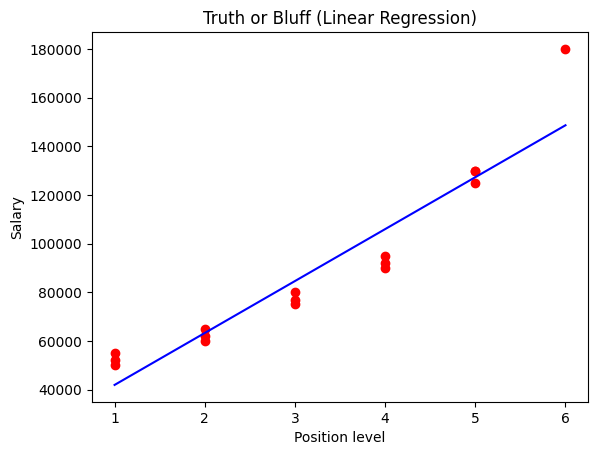

In [24]:
# Предсказание, обработка и визуализация результатов
y_pred_lin = lin_reg.predict([[6.5]])
y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print(y_pred_lin, y_pred_poly)
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

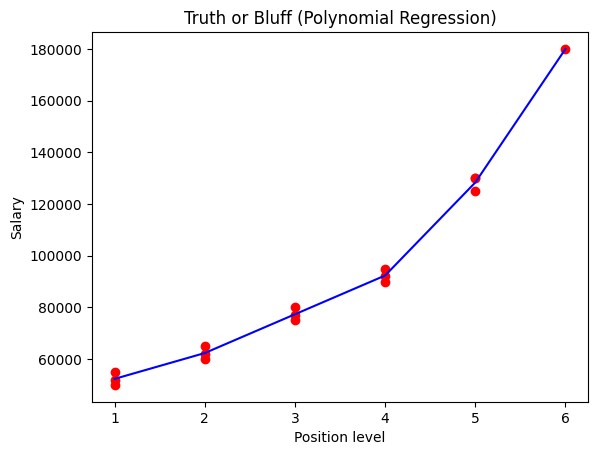

In [25]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

/tmp/ipykernel_57794/3061864919.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


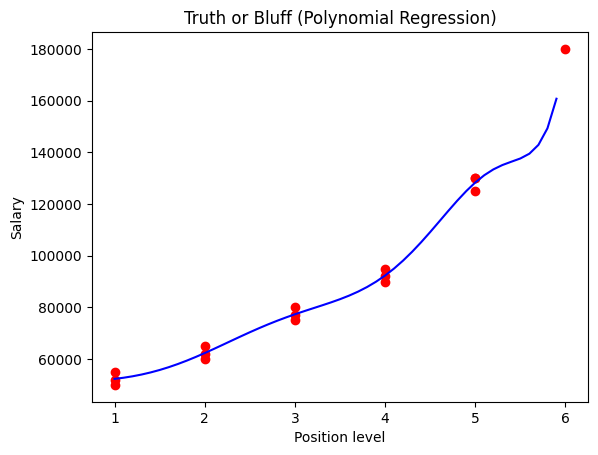

In [26]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Контрольные вопросы

1. Почему при реализации многомерной линейной регрессии
необходимо добавить фиктивный признак с единственным значением 1.0?

    Добавление фиктивного признака с единицей (также известного как фиктивная переменная) в многомерной линейной регрессии преследует две цели:

    1. Обеспечение члена свободного члена:
        Фиктивный признак в сочетании с его коэффициентом (обычно фиксированным на 1) играет роль члена свободного члена в уравнении регрессии. Это позволяет модели прогнозировать значения целевой переменной даже при нулевых значениях всех остальных входных переменных.

    2. Интерпретация коэффициентов:
        Когда фиктивный признак кодирует категориальный признак (например, пол: 1 - мужской, 0 - женский), его коэффициент представляет собой разницу в среднем значении целевой переменной между двумя категориями при нулевых значениях всех остальных переменных.

2. Что такое фиктивная переменная? Поясните причину удаления одной
фиктивной переменной, возникающей при перекодировке категориального
признака.

    Фиктивная переменная - это искусственно созданный столбец в наборе данных, используемый для представления категориального признака в модели линейной регрессии.

    Для каждой категории признака создается отдельная фиктивная переменная, которая кодируется 1 для объектов, принадлежащих этой категории, и 0 - для остальных.

    Удаление одной фиктивной переменной при перекодировке категориального признака необходимо для избежания проблемы мультиколлинеарности. Мультиколлинеарность возникает, когда две или более фиктивных переменные линейно зависимы друг от друга, что приводит к нестабильным оценкам коэффициентов регрессии.

    Удаление одной фиктивной переменной гарантирует, что все фиктивные переменные будут независимыми, тем самым решая проблему мультиколлинеарности.

3. С использованием какого класса создается модель полиномиальной
регрессии?

    В библиотеке scikit-learn Python для создания модели полиномиальной регрессии используется класс PolynomialFeatures.

    Этот класс позволяет преобразовать набор данных, добавляя члены взаимодействия и полиномиальные преобразования входных признаков.

4. Поясните принцип преобразования признаков при построении
полиномиальной регрессии.

    Класс PolynomialFeatures из scikit-learn позволяет преобразовать входные признаки несколькими способами:

    - Добавление членов взаимодействия: Создает новые признаки, являющиеся произведением двух или более исходных признаков.
    - Степенные преобразования: Создает новые признаки, являющиеся возведением в степень исходных признаков.
    - Комбинация: Можно комбинировать оба типа преобразований для создания более сложных полиномиальных членов.
    
    Уровень взаимодействия и степень преобразования задаются пользователем.

5. Возможно ли применение технологий масштабирования признаков
при реализации полиномиальной регрессии?

    Да, масштабирование признаков может быть применено к полиномиальной регрессии.

    Масштабирование помогает нормализовать диапазон значений признаков, что может улучшить производительность модели и ее сходимость.

    Однако важно отметить, что масштабирование следует применять после преобразования признаков с помощью PolynomialFeatures.

    Это связано с тем, что масштабирование до преобразования может привести к нежелательным изменениям в интерпретации полиномиальных членов.